**About the Problem:**      

.

---



In [91]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from google.colab import drive

In [61]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
ross_df=pd.read_csv('/content/drive/MyDrive/Intership/Rossmann Store Sales/train.csv')
store_df=pd.read_csv('/content/drive/MyDrive/Intership/Rossmann Store Sales/store.csv')

<ipython-input-62-8ac0e6730856>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  ross_df=pd.read_csv('/content/drive/MyDrive/Intership/Rossmann Store Sales/train.csv')


In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
# Set the max_columns option to display all columns
pd.set_option('display.max_columns', None)

In [65]:
ross_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [66]:
store_df.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [67]:
# lets combine data of store_df and ross_df
df=ross_df.merge(store_df,how='left',on='Store')
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [68]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [70]:
df.nunique()

Store                         1115
DayOfWeek                        7
Date                           942
Sales                        21734
Customers                     4086
Open                             2
Promo                            2
StateHoliday                     5
SchoolHoliday                    2
StoreType                        4
Assortment                       3
CompetitionDistance            654
CompetitionOpenSinceMonth       12
CompetitionOpenSinceYear        23
Promo2                           2
Promo2SinceWeek                 24
Promo2SinceYear                  7
PromoInterval                    3
dtype: int64

In [71]:
df['Date'] = pd.to_datetime(df['Date'],infer_datetime_format=True)# changing data dtype to datatime64
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df=df.drop('Date',axis=1)
df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day
0,1,5,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31
1,2,5,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31
2,3,5,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31
3,4,5,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31
4,5,5,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31


### let's fill the remaining missing data <a name="subparagraph1"></a>



In [72]:
df.isnull().sum()

Store                             0
DayOfWeek                         0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
year                              0
month                             0
day                               0
dtype: int64

In [73]:
df.shape

(1017209, 20)

In [74]:
missing_vals = pd.DataFrame(df.isna().sum(), columns=['Sum'])
missing_vals = missing_vals.sort_values(by = ['Sum'], ascending=False)
missing_vals = missing_vals[missing_vals['Sum']>0]  
missing_vals['Percent'] = missing_vals['Sum']/1017209*100    #creating another column with percent
missing_vals

,Sum,Percent
PromoInterval,508031,49.943620
Promo2SinceYear,508031,49.943620
Promo2SinceWeek,508031,49.943620
CompetitionOpenSinceYear,323348,31.787764
CompetitionOpenSinceMonth,323348,31.787764
CompetitionDistance,2642,0.259730


In [75]:
cols=['PromoInterval','Promo2SinceYear','Promo2SinceWeek','CompetitionOpenSinceYear','CompetitionOpenSinceMonth']

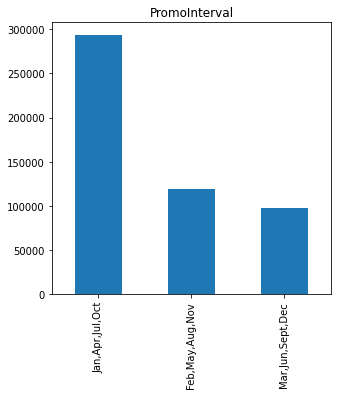

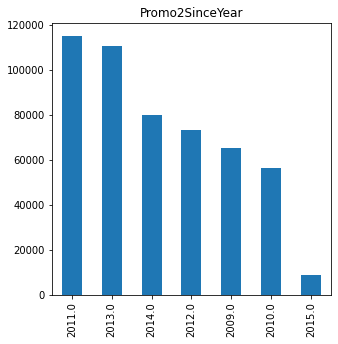

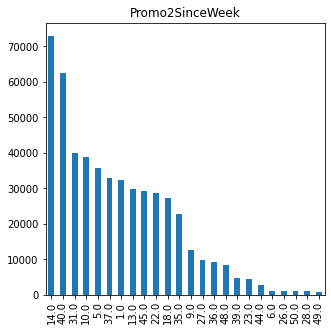

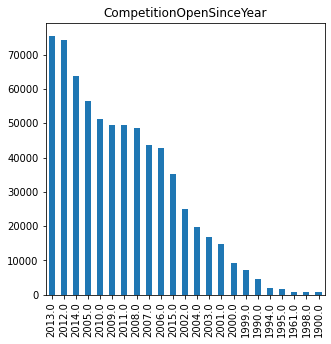

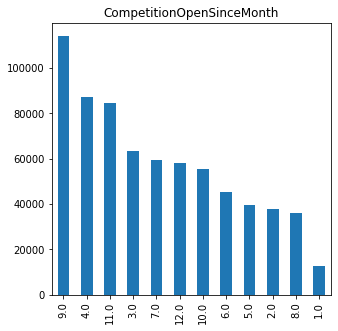

In [76]:
# iterate over the columns and create a bar plot for each column
for col in cols:
    plt.figure(figsize=(5, 5))
    df[col].value_counts().plot.bar()
    plt.title(col)
    plt.show()

In [77]:
#filling missing values in columns by mode

for col in cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [78]:
# fill NaNs with median of column CompetitionDistance
median_A = df['CompetitionDistance'].median()
df['CompetitionDistance'].fillna(median_A, inplace=True)

In [79]:
df.isnull().sum()

Store                        0
DayOfWeek                    0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
year                         0
month                        0
day                          0
dtype: int64

### Encoding <a name="subparagraph6"></a>




In [80]:
cols1=['Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','PromoInterval','Promo2SinceYear','Promo2SinceWeek','CompetitionOpenSinceYear','CompetitionOpenSinceMonth']

In [81]:
# Convert categorical columns into dummy variables
df_dummies = pd.get_dummies(df[cols1],columns=cols1, drop_first=True)

# Concatenate the dummy variables with the original dataframe
df = pd.concat([df, df_dummies], axis=1)

# Drop the original categorical columns
df.drop(columns=cols1, inplace=True)

# Print the updated dataframe
df.head()

,Store,DayOfWeek,Sales,Customers,CompetitionDistance,Promo2,year,month,day,Open_1,Promo_1,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,SchoolHoliday_1,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",Promo2SinceYear_2010.0,Promo2SinceYear_2011.0,Promo2SinceYear_2012.0,Promo2SinceYear_2013.0,Promo2SinceYear_2014.0,Promo2SinceYear_2015.0,Promo2SinceWeek_5.0,Promo2SinceWeek_6.0,Promo2SinceWeek_9.0,Promo2SinceWeek_10.0,Promo2SinceWeek_13.0,Promo2SinceWeek_14.0,Promo2SinceWeek_18.0,Promo2SinceWeek_22.0,Promo2SinceWeek_23.0,Promo2SinceWeek_26.0,Promo2SinceWeek_27.0,Promo2SinceWeek_28.0,Promo2SinceWeek_31.0,Promo2SinceWeek_35.0,Promo2SinceWeek_36.0,Promo2SinceWeek_37.0,Promo2SinceWeek_39.0,Promo2SinceWeek_40.0,Promo2SinceWeek_44.0,Promo2SinceWeek_45.0,Promo2SinceWeek_48.0,Promo2SinceWeek_49.0,Promo2SinceWeek_50.0,CompetitionOpenSinceYear_1961.0,CompetitionOpenSinceYear_1990.0,CompetitionOpenSinceYear_1994.0,CompetitionOpenSinceYear_1995.0,CompetitionOpenSinceYear_1998.0,CompetitionOpenSinceYear_1999.0,CompetitionOpenSinceYear_2000.0,CompetitionOpenSinceYear_2001.0,CompetitionOpenSinceYear_2002.0,CompetitionOpenSinceYear_2003.0,CompetitionOpenSinceYear_2004.0,CompetitionOpenSinceYear_2005.0,CompetitionOpenSinceYear_2006.0,CompetitionOpenSinceYear_2007.0,CompetitionOpenSinceYear_2008.0,CompetitionOpenSinceYear_2009.0,CompetitionOpenSinceYear_2010.0,CompetitionOpenSinceYear_2011.0,CompetitionOpenSinceYear_2012.0,CompetitionOpenSinceYear_2013.0,CompetitionOpenSinceYear_2014.0,CompetitionOpenSinceYear_2015.0,CompetitionOpenSinceMonth_2.0,CompetitionOpenSinceMonth_3.0,CompetitionOpenSinceMonth_4.0,CompetitionOpenSinceMonth_5.0,CompetitionOpenSinceMonth_6.0,CompetitionOpenSinceMonth_7.0,CompetitionOpenSinceMonth_8.0,CompetitionOpenSinceMonth_9.0,CompetitionOpenSinceMonth_10.0,CompetitionOpenSinceMonth_11.0,CompetitionOpenSinceMonth_12.0
0,1,5,5263,555,1270.0,0,2015,7,31,1,1,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,2,5,6064,625,570.0,1,2015,7,31,1,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,3,5,8314,821,14130.0,1,2015,7,31,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,5,13995,1498,620.0,0,2015,7,31,1,1,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,5,5,4822,559,29910.0,0,2015,7,31,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


### Train_test_split <a name="subparagraph6"></a>


In [82]:
X = df.drop(columns=['Sales'], axis=1)
y = df['Sales']

In [83]:
# Split the data into training and validation sets
train_size = int(len(df) * 0.7) # 70% of the data is used for training
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Print the size of each set
print('Training data:', len(X_train))
print('test data:', len(X_test))

Training data: 712046
test data: 305163


### Model Building <a name="subparagraph6"></a>


In [84]:
class DecisionTreeRegressor:
    def __init__(self, max_depth=2):
        self.max_depth = max_depth
    
    def fit(self, X, y):
        self.tree = self.build_tree(X, y, depth=0)
        
    def build_tree(self, X, y, depth):
        n_samples, n_features = X.shape
        
        if depth == self.max_depth or n_samples == 5:
            return np.mean(y)
        
        feature_idxs = np.random.choice(n_features, size=2, replace=False)
        best_feature, best_threshold = self.find_best_split(X, y, feature_idxs)
        
        if best_threshold is None:
            return np.mean(y)
        
        left_idxs = X[:, best_feature] < best_threshold
        right_idxs = X[:, best_feature] >= best_threshold
        
        left_tree = self.build_tree(X[left_idxs], y[left_idxs], depth+1)
        right_tree = self.build_tree(X[right_idxs], y[right_idxs], depth+1)
        
        return (best_feature, best_threshold, left_tree, right_tree)
    
    def find_best_split(self, X, y, feature_idxs):
        best_score = float('inf')
        best_feature = None
        best_threshold = None
        
        for feature in feature_idxs:
            thresholds = np.unique(X[:, feature])
            
            for threshold in thresholds:
                left_idxs = X[:, feature] < threshold
                right_idxs = X[:, feature] >= threshold
                
                if np.sum(left_idxs) == 0 or np.sum(right_idxs) == 0:
                    continue
                
                score = self.split_score(y, y[left_idxs], y[right_idxs])
                
                if score < best_score:
                    best_score = score
                    best_feature = feature
                    best_threshold = threshold
                    
        return best_feature, best_threshold
    
    def split_score(self, y, y_left, y_right):
        p_left = len(y_left) / len(y)
        p_right = len(y_right) / len(y)
        
        score = p_left * np.var(y_left) + p_right * np.var(y_right)
        
        return score
    
    def predict(self, X):
        return np.array([self.traverse_tree(x, self.tree) for x in X])
    
    def traverse_tree(self, x, node):
        if isinstance(node, float):
            return node
        
        feature, threshold, left_tree, right_tree = node
        
        if x[feature] < threshold:
            if isinstance(left_tree,float):
                return left_tree
            else:
                return self.traverse_tree(x, right_tree)
        else:
            if isinstance(right_tree,float):
                return right_tree
            else:
                return self.traverse_tree(x,right_tree)
        
class RandomForestRegressor:
    def __init__(self, n_trees=15, max_depth=2, subsample_size=0.5):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.subsample_size = subsample_size
        self.trees = []
        
    def fit(self, X, y):
        for i in range(self.n_trees):
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            n_samples = len(X)
            subsample_size = int(self.subsample_size * n_samples)
            subsample_idxs = np.random.choice(range(n_samples), size=subsample_size, replace=True)
            X_sub = X.iloc[subsample_idxs]
            y_sub = y.iloc[subsample_idxs]
            tree.fit(X_sub.values, y_sub.values)
            #tree.fit(X[subsample_idxs], y[subsample_idxs])
            self.trees.append(tree)
            
    def predict(self, X):
        if isinstance(X, (int, float)):
            X = np.array([[X]])
        elif isinstance(X, pd.Series):
            X = X.values.reshape(1, n_features)
        else:
            X = X.values
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(predictions, axis=0)

In [85]:
rf = RandomForestRegressor(n_trees=15, max_depth=2, subsample_size=0.5)
rf.fit(X_train, y_train)

In [86]:
# Make predictions on the train set
y_train_pred = rf.predict(X_train)

In [87]:
# Calculate mean absolute error
mae_train = np.abs(y_train.values - y_train_pred).mean()

# Calculate mean absolute error
print("Mean Absolute Error:", mae_train)

Mean Absolute Error: 2991.6361194861856


In [89]:
y_train_pred

array([5063.93250911, 5231.37425026, 5226.70726885, ..., 5224.27327797,
       5228.94025938, 5224.27327797])

In [88]:
# Make predictions on the test set
y_test_pred = rf.predict(X_test)

# Calculate mean absolute error
mae_test = np.abs(y_test.values - y_test_pred).mean()

# Calculate mean absolute error
print("Mean Absolute Error:", mae_test)

Mean Absolute Error: 2764.9751681348525


In [90]:
y_test_pred 

array([5214.33395963, 5228.94025938, 5224.27327797, ..., 5136.32018519,
       5136.32018519, 5126.38086684])

### Hyperparameter tuning <a name="subparagraph6"></a>


In [ ]:
class GridSearchCV:
    def __init__(self, estimator, param_grid, cv=5):
        self.estimator = estimator
        self.param_grid = param_grid
        self.cv = cv
    
    def fit(self, X, y):
        param_combinations = list(itertools.product(*self.param_grid.values()))
        best_params = None
        best_score = float('inf')
        for params in param_combinations:
            param_dict = dict(zip(self.param_grid.keys(), params))
            estimator = self.estimator(**param_dict)
            scores = []
            n_samples = len(X)
            fold_size = n_samples // self.cv
            for i in range(self.cv):
                start = i * fold_size
                end = (i+1) * fold_size if i != self.cv-1 else n_samples
                X_train = pd.concat([X.iloc[:start], X.iloc[end:]])
                y_train = pd.concat([y.iloc[:start], y.iloc[end:]])
                X_test = X.iloc[start:end]
                y_test = y.iloc[start:end]
                estimator.fit(X_train, y_train)
                y_pred = estimator.predict(X_test)
                score = np.mean((y_test - y_pred)**2)
                scores.append(score)
            avg_score = np.mean(scores)
            if avg_score < best_score:
                best_score = avg_score
                best_params = param_dict
        self.best_params_ = best_params
        self.best_estimator_ = self.estimator(**best_params)
        self.best_estimator_.fit(X, y)
        self.cv_results_ = {'params': [], 'mean_test_score': []}
        for params in param_combinations:
            param_dict = dict(zip(self.param_grid.keys(), params))
            self.cv_results_['params'].append(param_dict)
            estimator = self.estimator(**param_dict)
            scores = []
            n_samples = len(X)
            fold_size = n_samples // self.cv
            for i in range(self.cv):
                start = i * fold_size
                end = (i+1) * fold_size if i != self.cv-1 else n_samples
                X_train = pd.concat([X.iloc[:start], X.iloc[end:]])
                y_train = pd.concat([y.iloc[:start], y.iloc[end:]])
                X_test = X.iloc[start:end]
                y_test = y.iloc[start:end]
                estimator.fit(X_train, y_train)
                y_pred = estimator.predict(X_test)
                score = np.mean((y_test - y_pred)**2)
                scores.append(score)
            avg_score = np.mean(scores)
            self.cv_results_['mean_test_score'].append(avg_score)
        return self

# Define the parameter grid
param_grid = {
    'n_trees': [10, 20],
    'max_depth': [2, 4],
    'subsample_size': [0.5, 0.7]
}

# Define the estimator
estimator = RandomForestRegressor

# Perform grid search
grid_search = GridSearchCV(estimator, param_grid)
grid_search.fit(X_train, y_train)

# Print results
print("Best parameters:", grid_search.best_params_)
print("Best score:", np.mean((y_test - grid_search.best_estimator_.predict(X_test))**2))

In [ ]:
rf = RandomForestRegressor(n_trees=20, max_depth=2, subsample_size=0.7)
rf.fit(X_train, y_train)

In [ ]:
# Make predictions on the train set
y_train_pred = rf.predict(X_train)

# Calculate mean absolute error
mae_train = np.abs(y_train.values - y_train_pred).mean()

In [ ]:
# Calculate mean absolute error
print("Mean Absolute Error:", mae_train)

In [ ]:
# Make predictions on the test set
y_test_pred = rf.predict(X_test)

# Calculate mean absolute error
mae_test = np.abs(y_test.values - y_test_pred).mean()

In [ ]:
# Calculate mean absolute error
print("Mean Absolute Error:", mae_test)